# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
!pip install citipy

  Using cached citipy-0.0.6.tar.gz (675 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached kdtree-0.16-py2.py3-none-any.whl (7.7 kB)
  Created wheel for citipy: filename=citipy-0.0.6-py3-none-any.whl size=675977 sha256=10c0e78790c757c4a40aaef6719cad111d34362dd84fae6bc4d1e6ef4b36a437
  Stored in directory: c:\users\mjeow\appdata\local\pip\cache\wheels\4b\b5\88\49107ff846ec6967b34c17d369176c591fc90ed93b706755ad
Successfully built citipy


In [5]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | carnarvon
Processing Record 3 of Set 1 | papatowai
Processing Record 4 of Set 1 | lakheri
Processing Record 5 of Set 1 | afaahiti
Processing Record 6 of Set 1 | san antonio de pale
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | carutapera
Processing Record 9 of Set 1 | bamboo flat
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | port mathurin
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | susuman
Processing Record 14 of Set 1 | klyuchi
Processing Record 15 of Set 1 | perryton
Processing Record 16 of Set 1 | kendari
Processing Record 17 of Set 1 | poronaysk
Processing Record 18 of Set 1 | ouargla
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | uyuni
Processing Record 21 of Set 1 | bozoum
Processing Record 22 of Set 1 | college
Processing Reco

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,42.55,68,7,4.00,US,1702325191
1,carnarvon,-24.8667,113.6333,74.86,58,0,7.29,AU,1702325191
2,papatowai,-46.5619,169.4708,47.79,70,54,19.91,NZ,1702325192
3,lakheri,25.6667,76.1667,61.57,45,0,2.93,IN,1702325192
4,afaahiti,-17.7500,-149.2833,82.27,80,92,22.41,PF,1702325192


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data_cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data_cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,42.55,68,7,4.00,US,1702325191
1,carnarvon,-24.8667,113.6333,74.86,58,0,7.29,AU,1702325191
2,papatowai,-46.5619,169.4708,47.79,70,54,19.91,NZ,1702325192
3,lakheri,25.6667,76.1667,61.57,45,0,2.93,IN,1702325192
4,afaahiti,-17.7500,-149.2833,82.27,80,92,22.41,PF,1702325192


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

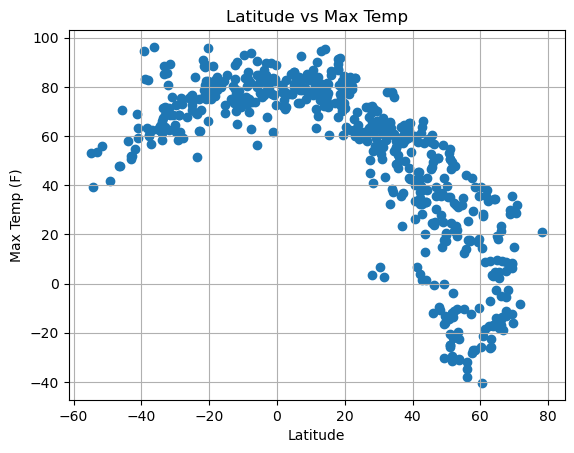

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])
# Incorporate the other graph properties
plt.title("Latitude vs Max Temp")
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
# Specify the output folder
output_folder = "output_data"
os.makedirs(output_folder, exist_ok=True)
# Save the figure in the 'output_data' folder
plt.savefig(os.path.join(output_folder, "Fig1.png"))
# Show plot
plt.show()

#### Latitude Vs. Humidity

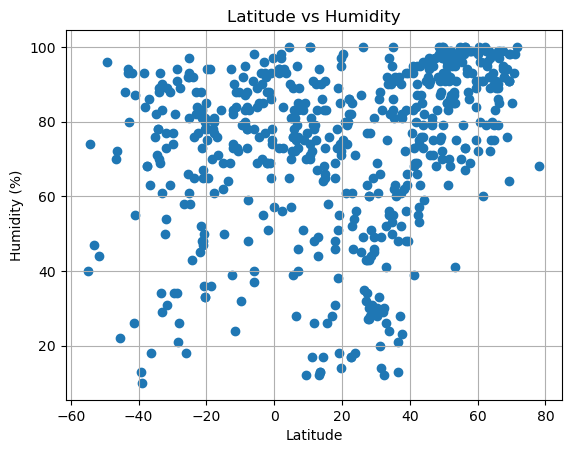

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title("Latitude vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()
# Save the figure
plt.savefig(os.path.join(output_folder, "Fig2.png"))

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

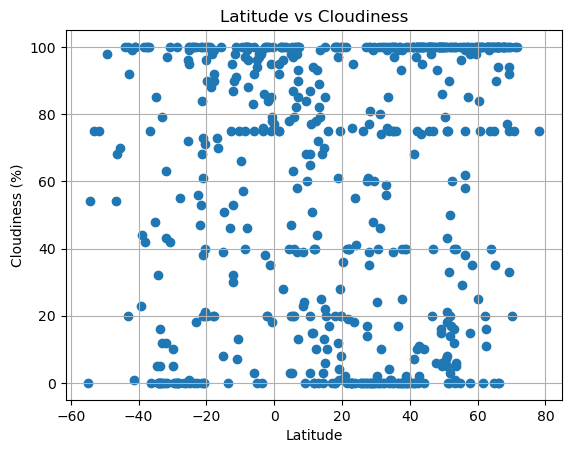

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()
# Save the figure
plt.savefig(os.path.join(output_folder, "Fig3.png"))

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

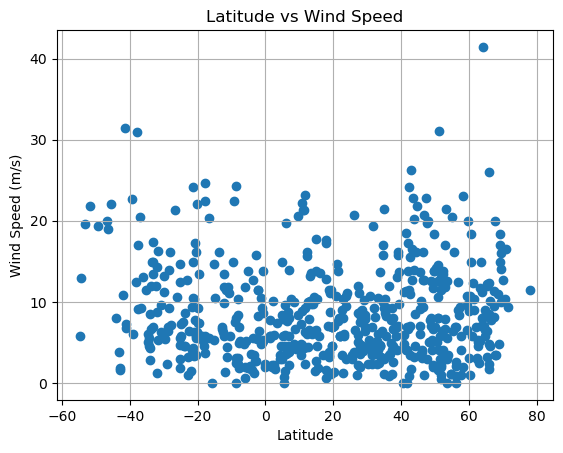

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])
# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig(os.path.join(output_folder, "Fig4.png"))

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,42.55,68,7,4.00,US,1702325191
3,lakheri,25.6667,76.1667,61.57,45,0,2.93,IN,1702325192
8,bamboo flat,11.7000,92.7167,82.49,78,40,2.30,IN,1702325062
11,jamestown,42.0970,-79.2353,32.56,87,100,13.80,US,1702325022
12,susuman,62.7833,148.1667,-7.02,96,100,5.01,RU,1702325194


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,carnarvon,-24.8667,113.6333,74.86,58,0,7.29,AU,1702325191
2,papatowai,-46.5619,169.4708,47.79,70,54,19.91,NZ,1702325192
4,afaahiti,-17.7500,-149.2833,82.27,80,92,22.41,PF,1702325192
5,san antonio de pale,-1.4014,5.6325,77.13,88,100,4.81,GQ,1702325095
6,waitangi,-43.9535,-176.5597,57.81,88,100,8.01,NZ,1702325192


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.6842612145879342


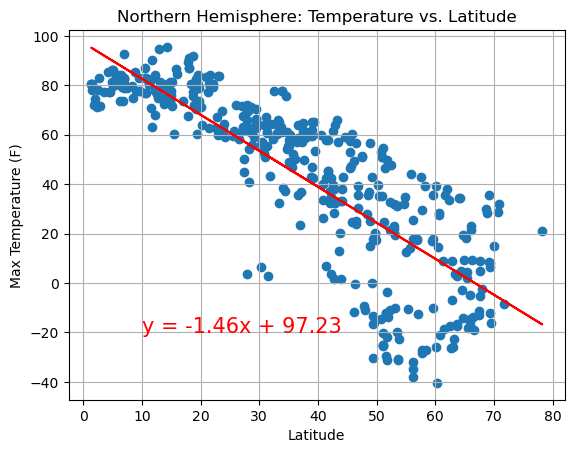

In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >=0]

# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the data
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

# Add the regression line to the plot
plt.plot(northern_hemi_df["Lat"], intercept + slope*northern_hemi_df["Lat"], '-r')

# Add labels and title to the plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere: Temperature vs. Latitude')
plt.grid()
plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")


The r-squared is: 0.3440891759288301


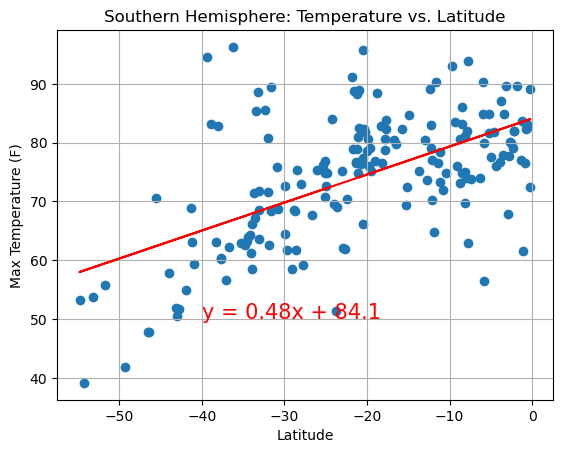

In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create a scatter plot of the data
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

# Add the regression line to the plot
plt.plot(southern_hemi_df["Lat"], intercept + slope*southern_hemi_df["Lat"], '-r')

# Add labels and title to the plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere: Temperature vs. Latitude')
plt.grid()
plt.annotate(line_eq,(-40,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

**Discussion about the linear relationship:** There is a correlation between lattitude and temperature in both Hemispheres. The temperature and lattitude have a negative correlation in the Northen hemisphere of .68, while the Southern Hemisphere has a .34 postive correlation.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.14515277668307922


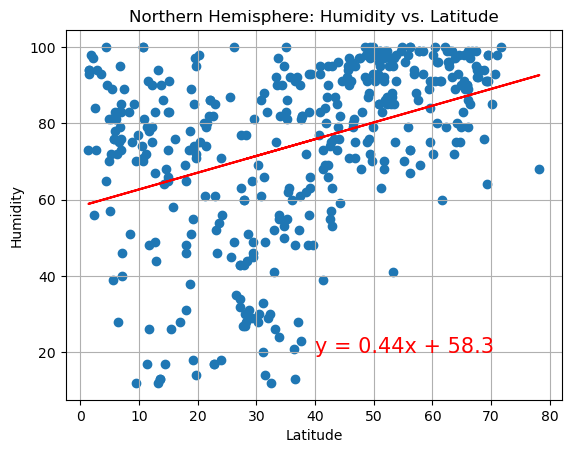

In [23]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

# Add the regression line to the plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern_hemi_df["Lat"], intercept + slope*northern_hemi_df["Lat"], '-r')

# Add labels and title to the plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere: Humidity vs. Latitude')
plt.grid()
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.04344985479223489


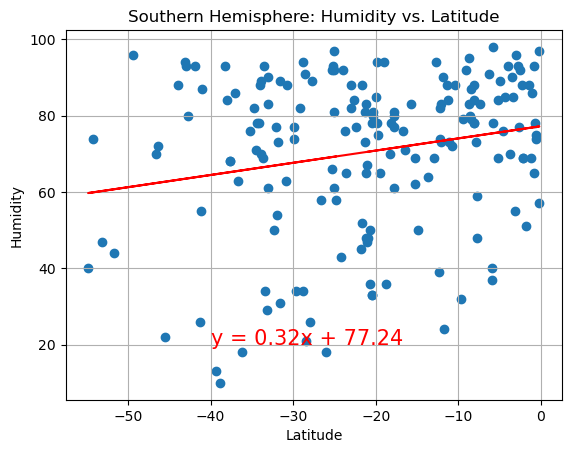

In [24]:
# Southern Hemisphere
# Create a scatter plot of the data
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

# Add the regression line to the plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern_hemi_df["Lat"], intercept + slope*southern_hemi_df["Lat"], '-r')

# Add labels and title to the plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere: Humidity vs. Latitude')
plt.grid()
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

**Discussion about the linear relationship:** Both Hemispheres had postive correlations for Humidity and Latitude. The Southern has a much weaker at .04.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0379824465215415


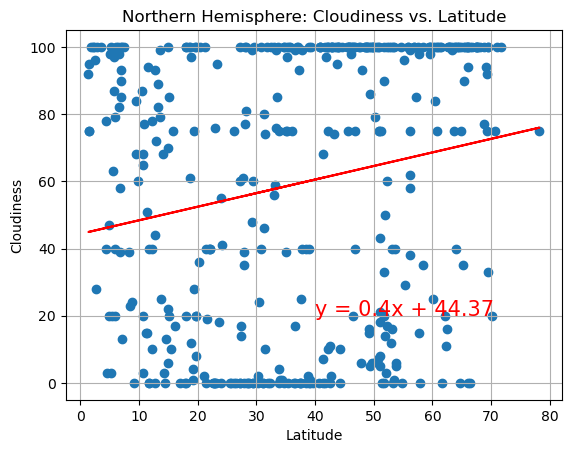

In [25]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

# Add the regression line to the plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern_hemi_df["Lat"], intercept + slope*northern_hemi_df["Lat"], '-r')

# Add labels and title to the plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere: Cloudiness vs. Latitude')
plt.grid()
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.05524268648367468


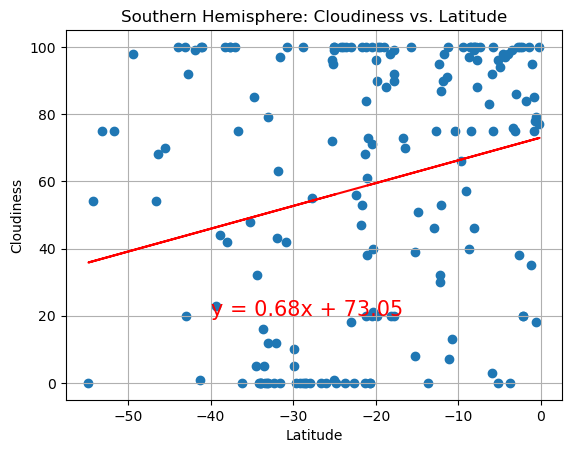

In [26]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

# Add the regression line to the plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern_hemi_df["Lat"], intercept + slope*southern_hemi_df["Lat"], '-r')

# Add labels and title to the plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere: Cloudiness vs. Latitude')
plt.grid()
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

**Discussion about the linear relationship:** Both hempishperes have a sub .05 r score denoting a weak correlation between Cloudiness and Latitude. It is stronger in the Southern and could potentially be impacted by sample size. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.02117790490587601


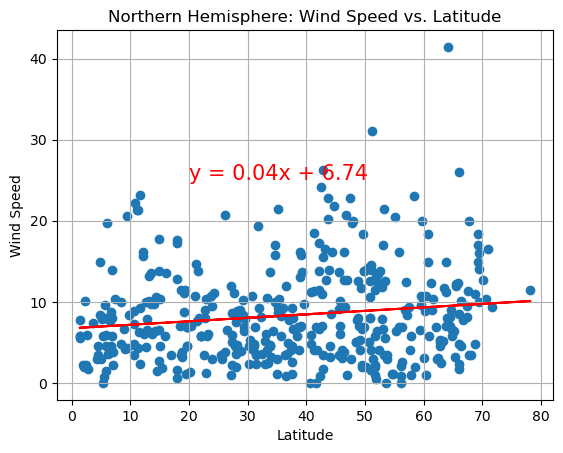

In [27]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

# Add the regression line to the plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern_hemi_df["Lat"], intercept + slope*northern_hemi_df["Lat"], '-r')

# Add labels and title to the plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere: Wind Speed vs. Latitude')
plt.grid()
plt.annotate(line_eq,(20,25),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.10172018704949821


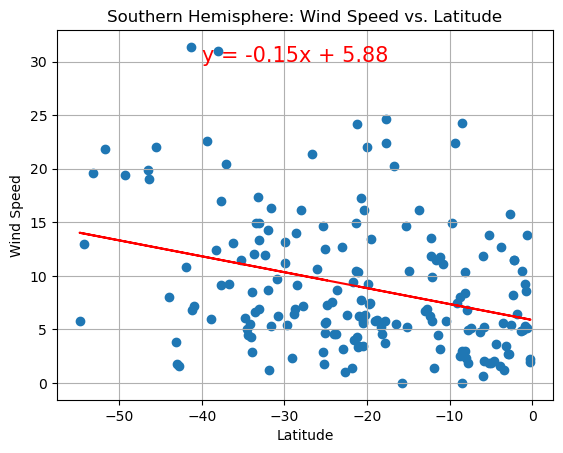

In [28]:
# Southern Hemisphere
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

# Add the regression line to the plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern_hemi_df["Lat"], intercept + slope*southern_hemi_df["Lat"], '-r')

# Add labels and title to the plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere: Wind Speed vs. Latitude')
plt.grid()
plt.annotate(line_eq,(-40,30),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

**Discussion about the linear relationship:** The Northern Hemisphere has a near linear correlation where wind speed is about the same no matter the Latitude. The Southern has a negative .10 showing that the higher the latitude the lower the windspeed. 